In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import scipy.ndimage as nd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.signal import find_peaks_cwt
from scipy import signal, interpolate

In [3]:
spectra = pd.read_csv('data/Unknown_sample_spectra.csv')

In [4]:
# The txt file contains: wavelength and intensity
# the wavelength is in microns not nanometers
fname = 'data/known_spectra_peaks/argon.txt'
Ar = np.loadtxt(fname)

In [5]:
def scale(x, in_min, in_max, out_min, out_max):
    return (x - in_min) * (out_max - out_min) / (in_max - in_min) + out_min

In [6]:
# rescale intensities to values between 0-255.  This is scale of 
# the captured image
Ar[:,1] = scale(Ar[:,1], Ar[:,1].min(), Ar[:,1].max(), 0 , 255)

In [7]:
# convert to nanometers
Ar[:,0] = Ar[:,0] / 10

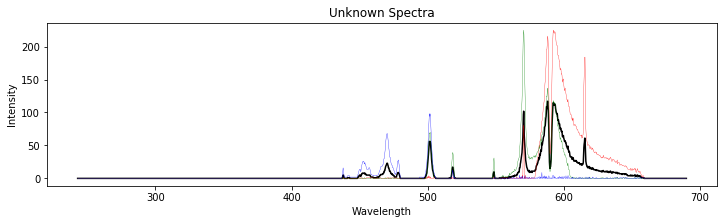

In [8]:
fig, ax = plt.subplots(1, figsize=(12,3))

x = spectra['Wavelength']

plt.plot(x, spectra['Average'], color='black')
plt.plot(x, spectra['Red'], color='red', lw=0.3)
plt.plot(x, spectra['Green'], color='green', lw=0.3)
plt.plot(x, spectra['Blue'], color='blue', lw=0.3)
plt.title("Unknown Spectra")
plt.xlabel('Wavelength')
plt.ylabel('Intensity')

In [9]:
avg_spectra = scale(spectra['Average'], spectra['Average'].min(), spectra['Average'].max(), 0, 255)

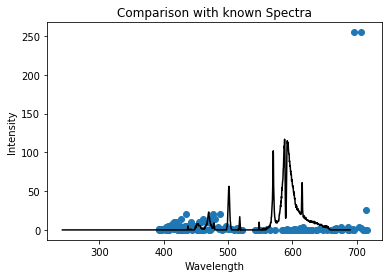

In [10]:
# hmm...doesnt seem similar...must be something else...
plt.scatter(Ar[:,0], Ar[:,1])
plt.plot(x, spectra['Average'], color='black')
plt.title('Comparison with known Spectra')
plt.xlabel('Wavelength')
plt.ylabel('Intensity')

## Misc - Remove background noise

In [11]:
Mg = nd.imread('data/magnesium_spectra.jpg')

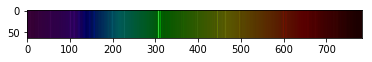

In [12]:
plt.imshow(Mg)

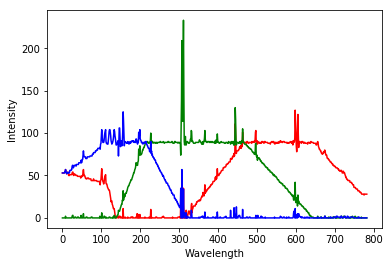

In [13]:
# plot individual color channels (r,g,b).  Notice the three 'bands'.  The colors
# should be filtered to just those bands (notice the red channel located in the 0-100
# nanometer section)
plt.plot(Mg[:,:,0].mean(axis=0), c='r')
plt.plot(Mg[:,:,1].mean(axis=0), c='g')
plt.plot(Mg[:,:,2].mean(axis=0), c='b')
plt.xlabel('Wavelength')
plt.ylabel('Intensity')

In [14]:
# The spline function is meant to model the background noise.  First, model the
# signal. Then take the first derivative which should remove the background.
#
# Then use a filter to remove values beyond the main spectra area.  For example,
# the red channel has values from 0-100 which should be removed.  This should be 
# gaussian and is not implemented yet

def spline(y):
    x = np.arange(y.shape[0])
    tck = interpolate.splrep(x, y, s=822) # m + sqrt(2*m)
    xnew = np.arange(0,783)
    
    # take the first derivative
    ynew = interpolate.splev(xnew, tck, der=1)
    return xnew, np.abs(ynew)

res = []
for i in range(3):
    y = Mg[:,:,i].mean(axis=0)
    xnew, ynew = spline(y)
    res.append(ynew)

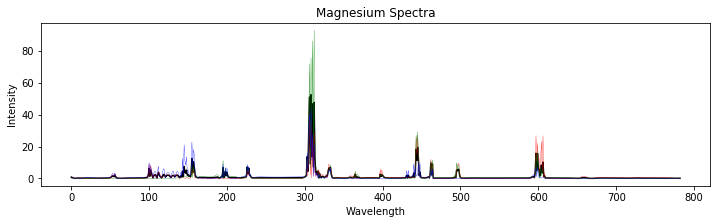

In [15]:
fig, ax = plt.subplots(figsize=(12,3))
ax.plot(np.array(res).T.mean(axis=1), c='black')
ax.plot(res[0], c='r', lw=0.3)
ax.plot(res[1], c='g', lw=0.3)
ax.plot(res[2], c='b', lw=0.3)
plt.title('Magnesium Spectra')
plt.xlabel('Wavelength')
plt.ylabel('Intensity')